# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Step 1. Import Python Modules

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2 Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load **all_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

Hint: Use `pd.read_csv()`


In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

What six countries are represented in the data?

In [4]:
countries = ["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"]
print(countries)    


['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']


What years are represented in the data?

In [5]:
# The year range is 2000-2015 


## Step 4 Tweak The DataFrame

Look at the column names of the DataFrame `df` using `.head()`. 

In [6]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


What do you notice? The first two column names are one word each, and the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. 

**Revise The DataFrame Part A:** 

Use Pandas to change the name of the last column to `LEABY`.

Hint: Use `.rename()`. [You can read the documentation here.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)). </font>

In [7]:
df.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)

Run `df.head()` again to check your new column name worked.

In [8]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


---

## Step 5 Bar Charts To Compare Average

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in `df` using `Country` on the x-axis and `GDP` on the y-axis. 
Remember to `plt.show()` your chart!

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


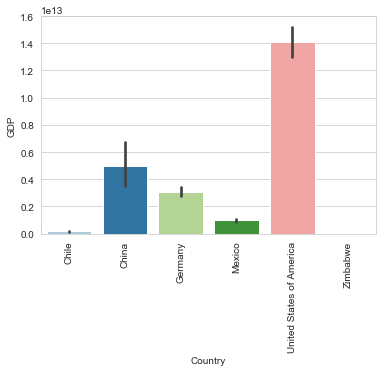

In [28]:
#Colour & style
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Paired", 9)
sns.set_palette(custom_palette)

#Plot 
sns.barplot(data=df, x="Country", y="GDP")
plt.xticks(rotation=90)

plt.show()

B) Create a bar chart using the data in `df` with `Country` on the x-axis and `LEABY` on the y-axis.
Remember to `plt.show()` your chart!

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


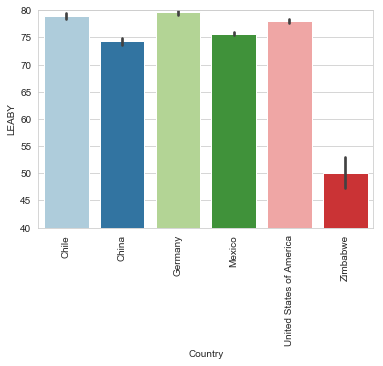

In [35]:
#colour & style 
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Paired", 9)
sns.set_palette(custom_palette)

#plot
sns.barplot(data=df, x="Country", y="LEABY")
plt.xticks(rotation=90)
plt.ylim(40, 80)
plt.show()

What do you notice about the two bar charts? Do they look similar?

In [ ]:
# Using the mean of GDP and Life expecntancy does not appear to indicate a clear correlation between GDP and life expectancy. Despite having an approximately seven times 
# larger average GDP size, The US has a lower LEABY than Germany. Likewise, China has the second highest GDP, but the the second lowest
# LEABY. There are some examples however where there appears to be a correlation between economic strengh and LEABY, with Zimbabwe
# having both the lowest GDP and lowest LEABY. GDP per capita would provide a more accurate indication of whether there is a clear
# correlation between economic strength and health prospects at birth since it would account for the vast differences in population
# between a country like China (over a billion citizens) and Germany (less than 100 million). Likewise changes over
# time would also give a clearer indication of correlation (e.g does an increase in GDP lead to an increase in LEABY?)


## Step 6. Violin Plots To Compare Life Expectancy Distributions 

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail. 
1. Create an `sns.violinplot()` for the dataframe `df` and map `Country` and `LEABY` as its respective `x` and `y` axes. 
2. Be sure to show your plot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


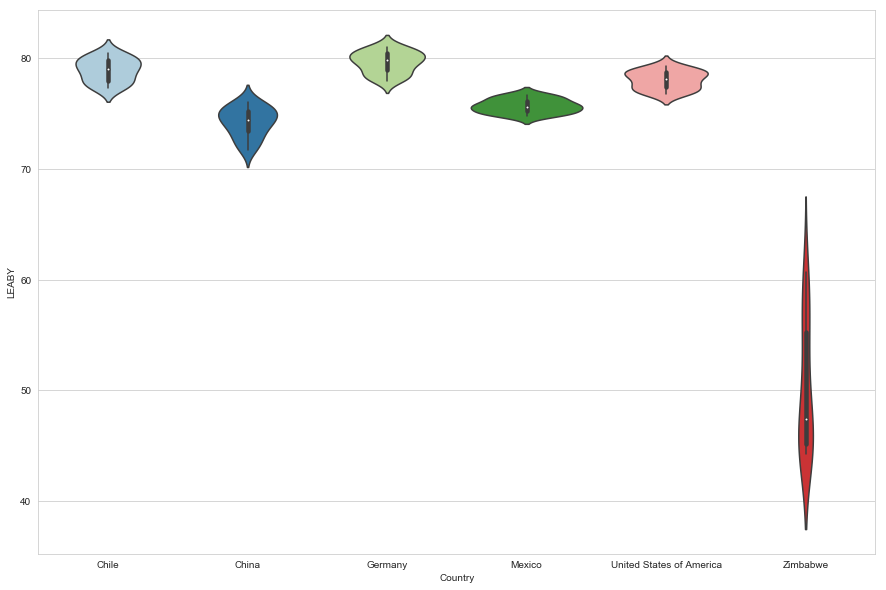

In [47]:
# colour & styling 
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Paired", 9)
sns.set_palette(custom_palette)

#plot
fig = plt.subplots(figsize=(15, 10)) 
sns.violinplot(data=df, x="Country", y="LEABY",)
plt.savefig("violinplot.png")
plt.show()



What do you notice about this distribution? Which country's life expactancy has changed the most?

 #line plots would be a better way of illustrating change over time, but the violin plot also still indicates that Zimbabwe has experienced a dramatic increase in life expectancy over time due to the large range. It is also interesting to note China's initial rapid growth followed by a tailing off near the upper quartile. 

## Step 7. Bar Plots Of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy. 

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn.
We have set up a figure with the correct dimensions for your plot. Under that declaration:
1. Save `sns.barplot()` to a variable named `ax`
2. Chart `Country` on the x axis, and `GDP` on the `Y` axis on the barplot. Hint: `ax = sns.barplot(x="Country", y="GDP")`
3. Use the `Year` as a `hue` to differentiate the 15 years in our data. Hint: `ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)`
4. Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use `plt.xticks("rotation=90")`
5. Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to `"GDP in Trillions of U.S. Dollars"`. Hint: `plt.ylabel("GDP in Trillions of U.S. Dollars")`
6. Be sure to show your plot.


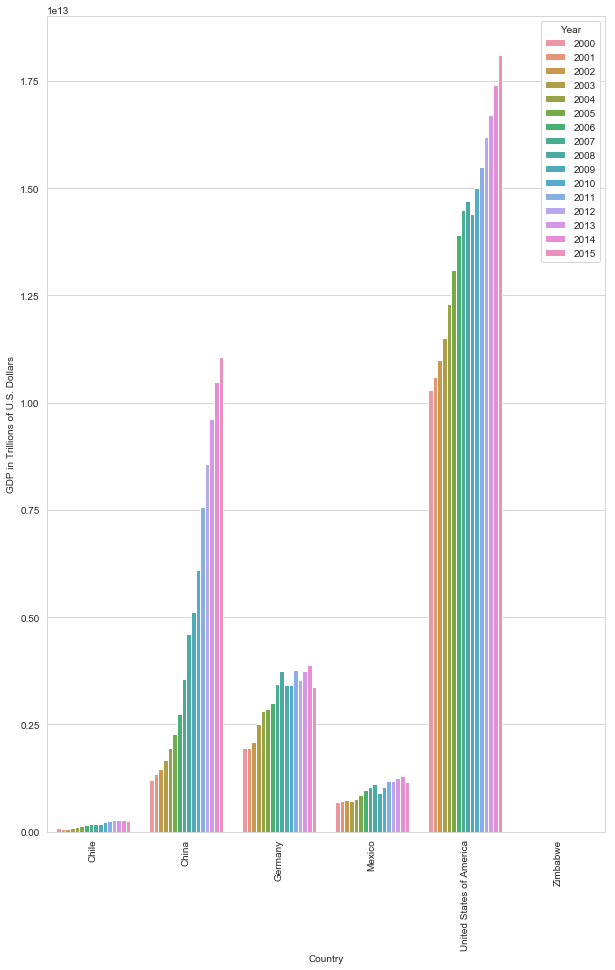

In [36]:
#colour and style 
sns.set_style("whitegrid")

#plot
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)

plt.xticks(rotation=90)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()

Now that we have plotted a barplot that clusters GDP over time by Country, let's do the same for Life Expectancy.

The code will essentially be the same as above! The beauty of Seaborn relies in its flexibility and extensibility. Paste the code from above in the cell bellow, and: 
1. Change your `y` value to `LEABY` in order to plot life expectancy instead of GDP. Hint: `ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)`
2. Tweak the name of your `ylabel` to reflect this change, by making the label `"Life expectancy at birth in years"` Hint: `ax.set(ylabel="Life expectancy at birth in years")`


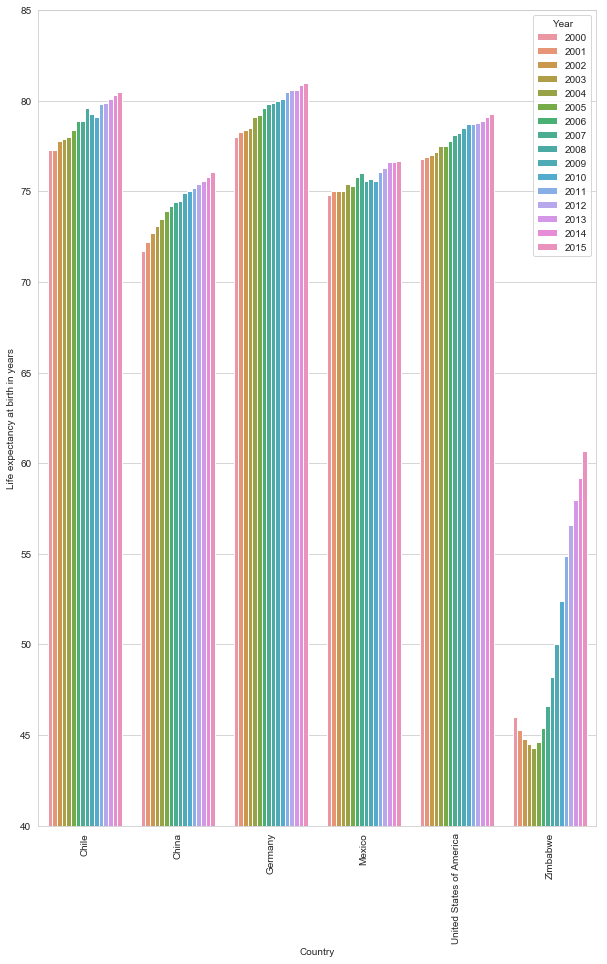

In [37]:
#Colour & style
sns.set_style("whitegrid")

#plot 
f, ax = plt.subplots(figsize=(10, 15)) 
ax = sns.barplot(x="Country", y="LEABY", hue="Year", data=df)
plt.xticks(rotation=90)
plt.ylim(40, 85)
plt.ylabel("Life expectancy at birth in years")
plt.show()

What are your first impressions looking at the visualized data?

- Which countries' bars changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in GDP over time? 
- How do countries compare to one another?
- Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?
- Can you think of any reasons that the data looks like this for particular countries?

In [16]:
#•	Which countries' bars changes the most?

# 1. Zimbabwe clearly experienced the most severe changes in life expectancy, with an initial 6 year
#continual decline in LEABY, followed by a dramatic increase until the end of the time range 
#(the fastest of any country in the sample). It is difficult to compare this with economic growth due 
#to the extremely low GDP of Zimbabwe. 

# 2. China also experienced a rapid expansion in GDP (the largest of any country in the sample), 
#accompanied by continual year-on-year rises in LEABY. China is the only country to have had rising
#GDP and LEABY every single year (USA and Germany each had static LEABY growth or GDP declines in at least one year). 

#•	Which country has had the least change in GDP over time?

# 3. The barchart is difficult to assess change in GDP over time as it uses absolute values rather 
#than percentage increases. The rise in GDP for the US and China looks significantly larger than 
#for chile or Mexico, but this is due to them being far larger economies and not necessarily due 
#to having a faster growth rate. For example, a 2% growth rate in the US economy would result in 
#a far higher absolute GDP rise than a 10% rise in the Chilean economy. Nonetheless, It would appear
#hat Mexico and Germany have experienced the least economic growth when comparing 2000 and 2015. 

#•	Now that you can see the both bar charts, what do you think about the relationship between GDP 
#nd life expectancy?

#. 4 Unlike the barchart of mean GDP and LEABY, the barchart of change in GDP and LEABY over time does
#appear to indicate that there is a correlation between GDP growth and rising LEABY, with all countries
#in the sample showing this trend.  

#•	Can you think of any reasons that the data looks like this for particular countries?

# 5. China has experienced rapid economic expansion as a result of a range of factors, including:  
#reforming its economy from a command economy to a largely free-market system, extensive state investment in
#education and infrastructure, currency controls to ensure competitive exports and 
#limiting the birth rate to ensure sustainable population growth.



Note: You've mapped two bar plots showcasing a variable over time by country, however, bar charts are not traditionally used for this purpose. In fact, a great way to visualize a variable over time is by using a line plot. While the bar charts tell us some information, the data would be better illustrated on a line plot.  We will complete this in steps 9 and 10, for now let's switch gears and create another type of chart.

## Step 8. Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called `FacetGrid`. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!
    
Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. 
Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up for every Year in the data
3. We want the data points to be differentiated (hue) by Country.
4. We want to use a Matplotlib scatter plot to visualize the different graphs


Be sure to show your plot!


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


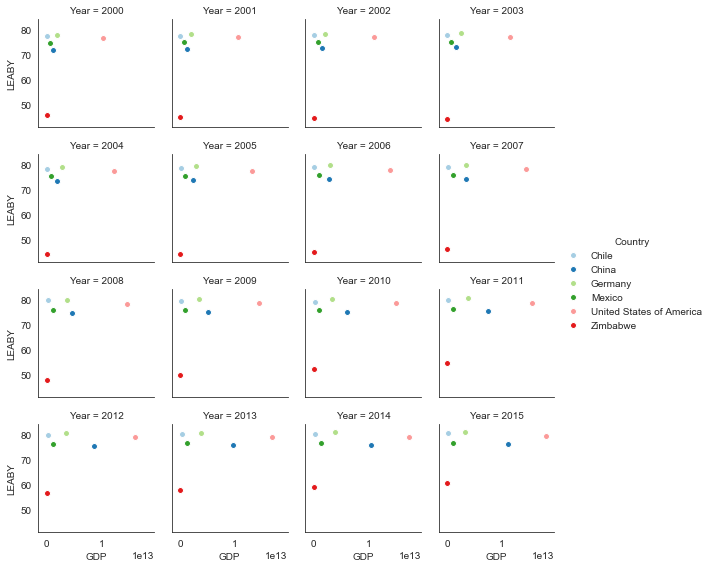

In [48]:
# WORDBANK:
# "Year"
# "Country" 
# "GDP" 
# "LEABY" 
# plt.scatter

#colour & style 
sns.set_style("white")
custom_palette = sns.color_palette("Paired", 9)
sns.set_palette(custom_palette)

# Uncomment the code below and fill in the blanks
g = sns.FacetGrid(df, col="Year", hue="Country", col_wrap=4, size=2)
g = (g.map(plt.scatter, "GDP", "LEABY", edgecolor="w").add_legend())
plt.savefig("scatter.png")


+ Which country moves the most along the X axis over the years?
+ Which country moves the most along the Y axis over the years?
+ Is this surprising?
+ Do you think these scatter plots are easy to read? Maybe there's a way to plot that! 

In [ ]:
# China experienced the most absolute GDP growth of any country over time 
# Zimbabwe saw the most rapid and extensive increase in LEABY
# This is not surprising, as while there is a clear correlation between rising GDP and LEABY, this does not account for 
# the bell curve of initial health improvements having a dramatic impact on LEABY (e.g immunization) nor does it acccount for 
# the possibility of health epidemics and the fact that is harder to increase LEABY once the average is already high
# scatter plots are quite tricky to ready but also extremely descriptive and useful due to the large number of variables you 
# can show 

## Step 9. Line Plots for Life Expectancy

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. 
It would be better illustrated with a line graph for each GDP and Life Expectancy by country. 

FacetGrid also allows you to do that! Instead of passing in `plt.scatter` as your Matplotlib function, you would have to pass in `plt.plot` to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks.  that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

1. In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
2. We want the columns to be split up by Country
3. We want to use a Matplotlib line plot to visualize the different graphs


Be sure to show your plot!



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


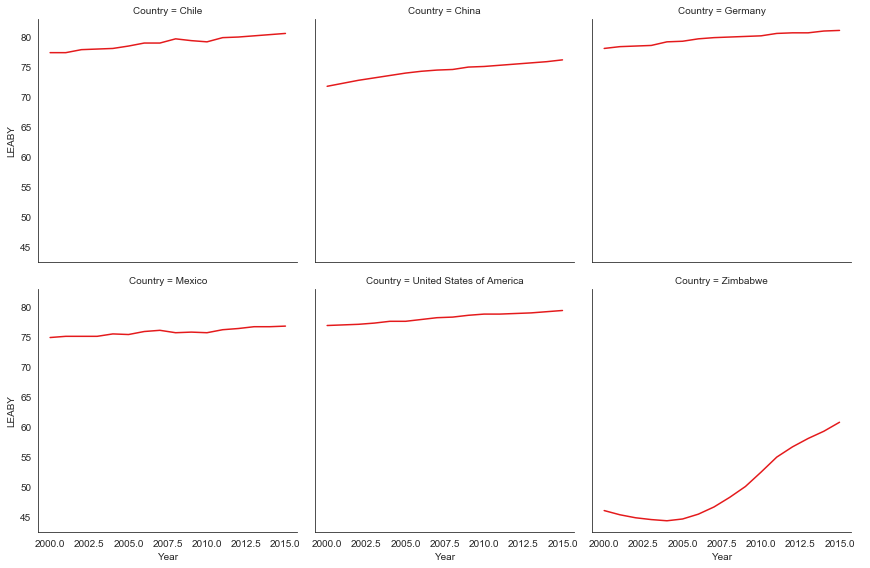

In [49]:
# WORDBANK:
# plt.plot
# "LEABY"
# "Year"
# "Country"

#colour and style 
sns.set_style("white")
custom_palette = sns.color_palette("Set1", 9)
sns.set_palette(custom_palette)

# Uncomment the code below and fill in the blanks
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = (g3.map(plt.plot, "Year", "LEABY").add_legend())
plt.savefig("line_LEABY.png")


What are your first impressions looking at the visualized data?

- Which countries' line changes the most?
- What years are there the biggest changes in the data?
- Which country has had the least change in life expectancy over time? 
- Can you think of any reasons that the data looks like this for particular countries?

 #Same comments as for the bar chart of LEABY over time (since they are effectively the same but in a different layout), although i would add that in this chart Mexico would appear to have had the least change over time 

## Step 10. Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


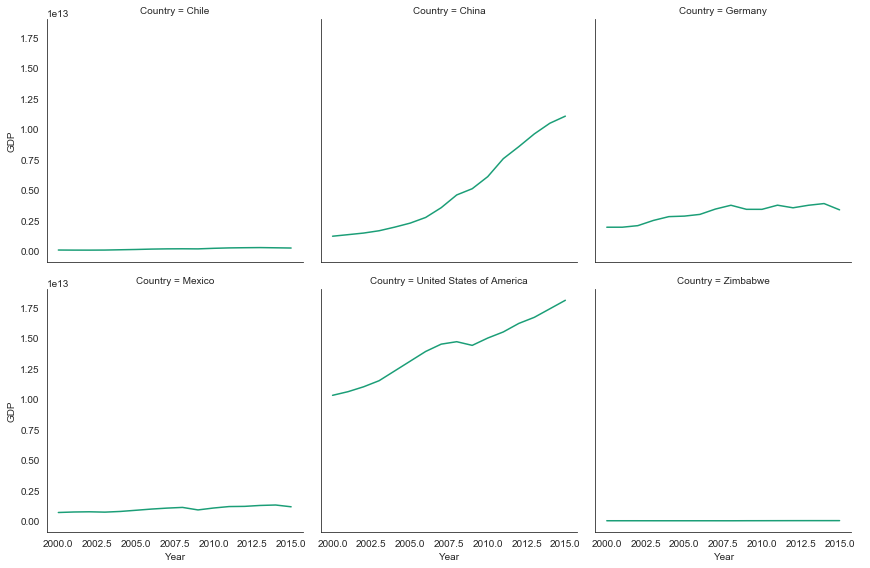

In [52]:
#colour & style 
sns.set_style("white")
custom_palette = sns.color_palette("Dark2", 9)
sns.set_palette(custom_palette)

#plot
g3 = sns.FacetGrid(df, col="Country", col_wrap=3, size=4)
g3 = (g3.map(plt.plot, "Year", "GDP").add_legend())

plt.savefig("line_GDP.png")


Which countries have the highest and lowest GDP?

In [ ]:
# The US has the highest GDP, but China has had the fastest GDP growth
# Zimbabwe has the lowest GDP, followed by Mexico.

Which countries have the highest and lowest life expectancy?

In [ ]:
# Germany has the highest life expectancy
# Zimbabwe has the lowest life expectancy

## Step 11 Researching Data Context 

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?

In [ ]:
# The rapid and extensive increase in LEABY in Zimbabwe is due to the country having launched a major successful campaign to combat 
# the HIV/AIDS prevalence in the country and reduce the transfer of the disease to children from parents. Zimbabwe has also 
# had success in reducing infant and maternal mortality rates 

## Step 12 Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data.
Include the following visuals in your blogpost:

1. The violin plot of the life expectancy distribution by country
2. The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
3. The facet grid of line graphs mapping GDP by country
4. The facet grid of line graphs mapping Life Expectancy by country


We encourage you to spend some time customizing the color and style of your plots! Remember to use `plt.savefig("filename.png")` to save your figures as a `.png` file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:
+ How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
+ What would have helped make the project data more reliable? What were the limitations of the dataset?
+ Which graphs better illustrate different relationships??